In [1]:
from dyMES.model import model
import matplotlib.pyplot as plt

## Running DyMES

A dyMES model can be initialized by creating an instance of the `model` class, this will store all states, lambdas, derivatives, and parameters.

In order to run the model out, the function `model.update` should be called. A simply example, using the transition function defined in `default_models.py` can be seen below.

Using Default Transition Function
Steady State at N = 100
Parameters: {'r0': 0.2, 'd0': 0.010011, 'S': 10, 'Nc': 95}


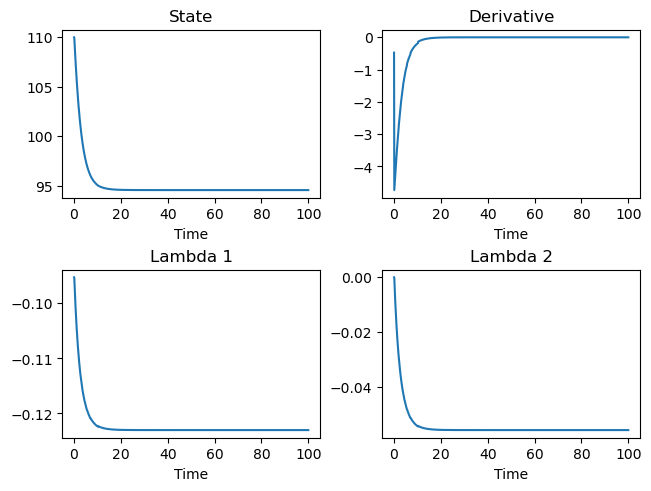

In [2]:
eco_dymes = model(110) #Starting off with 110 Individuals
eco_dymes.update(100,0.1) #Running it for 100 units of time with a timestep of 0.1
eco_dymes.graph() #Graphing the final result

## Changing parameters

All parameters such as `r0` and `d0` are stored in `model.params`, however the correct way to perturb any of these parameters is to call `model.update_param()`.

This is because parameters must be changed in a way such that all constraints can still be satisfied.

Using Default Transition Function
Steady State at N = 100
Parameters: {'r0': 0.2, 'd0': 0.010011, 'S': 10, 'Nc': 95}


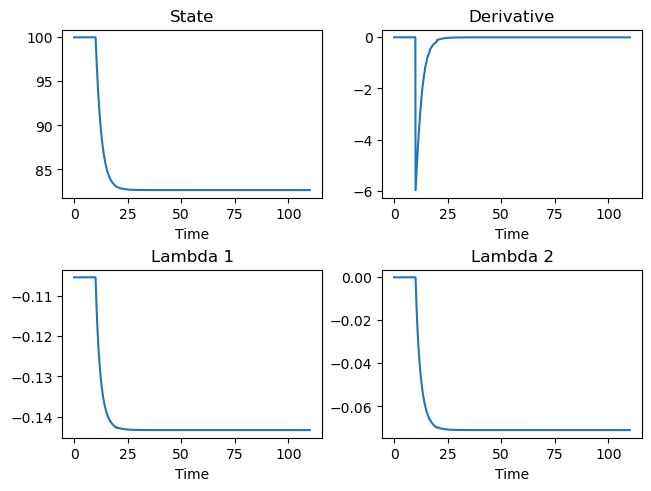

In [3]:
eco_dymes = model(100) #Starting off with 110 Individuals
eco_dymes.update(10,0.1) #Running it for 100 units of time with a timestep of 0.1
eco_dymes.update_param('d0', 0.013)
eco_dymes.update(100,0.1)
eco_dymes.graph() #Graphing the final result

As can be seen above, the model was run at steady state for 10 iterations, before `d0` was perturbed and it settled to a new steady state of ~83

## Defining Alternate Transition Functions

Alternate models can be created by defining two things:

1. A new transition function
2. A new parameter dictionary

Any transition function must take the following arguments in order

1. Micro-variable(`n` in the case of the ecological system)
2. Macro-Variable(`N`)
3. parameters: This is in the form of a dictionary

In [4]:
def New_Func(n, N, params):
    return params['r0'] * n - params['d0'] * n**2 * N/(params['Nc']) - params['d1'] * n

Next, a parameter dictionary must be defined. This, along with the new function must passed into a new instance of `model`

Additionally, in most cases there must be a variable representing the total number of groups in the system. In the paper, this is refered to as `S`. This should be the last argument passed when calling initializing a model.

In [ ]:
params_dict = {'r0':0.1, 'd0':0.01,'d1':0.001, 'Nc': 95, 'S':10}
initial_state = 200
new_model = model(initial_state, params_dict, New_Func, 'S')

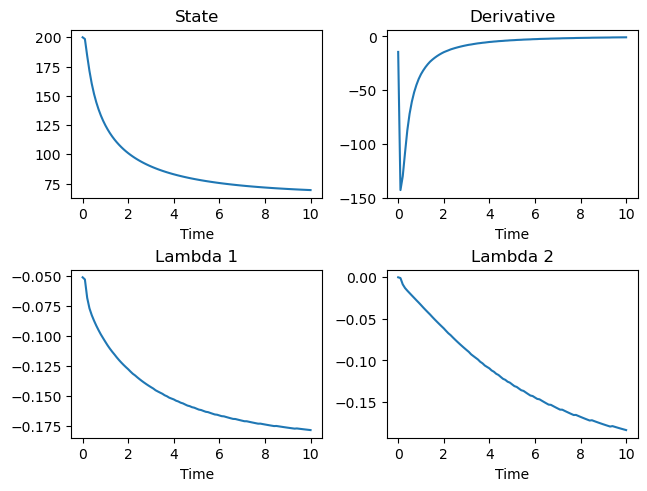

In [6]:
new_model.update(10,0.1)
new_model.graph()

## Finding Initial Steady State
Finally, it's sometimes helpful to calculate parameters such that the model starts off at an initial steady state. This can be done with `model.find_steady_state_params`

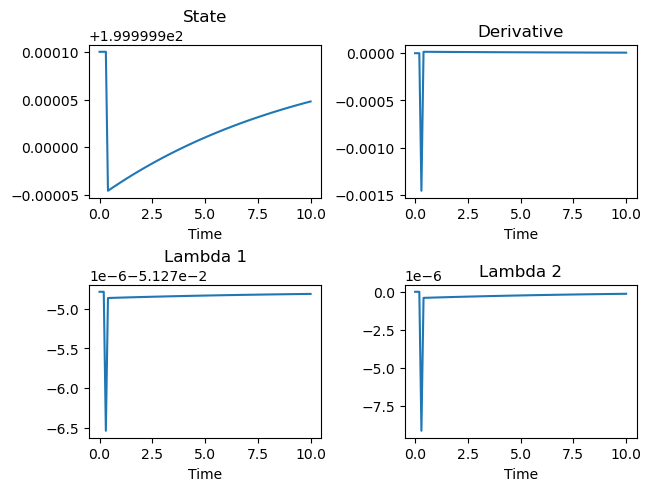

In [10]:
new_model = model(initial_state, params_dict, New_Func, 'S')
d0_steady_state_val = new_model.find_steady_state_params('d0')
new_model.update_param('d0', d0_steady_state_val)
new_model.update(10,0.1)
new_model.graph()